## Retas no plano cartesiano

A equação geral de uma reta no planos cartesiano é dada por $y=mx+n$. O coeficiente $m$ é a tangente do ângulo que a reta faz com o eixo x, $m$ é chamado de coeficiente angular. O coeficiente $n$ é o valor que a reta intercepta o eixo y, $n$ é chamado de coeficiente linear.

### Gráfico da reta utilizando a equação geral

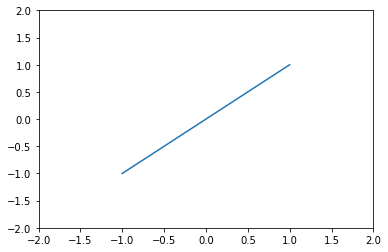

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-1, 1.1, 0.5) # x de -1 a 1
y = x # m = 0 e n = 0

plt.plot(x, y)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

Na reta anterior, usamos o coeficiente angular igual a 1. Faremos uma animação variando o coeficiente angular.

## Animação variando o coeficiente angular

MovieWriter ffmpeg unavailable; using Pillow instead.


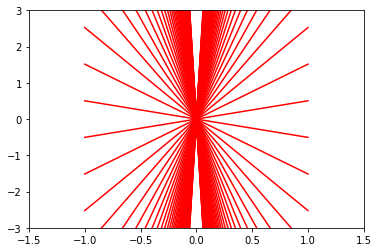

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = np.arange(-1,1.1,1), -50 * np.arange(-1,1.1,1)
reta, = plt.plot(xdata, ydata, 'r')

def init():
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-3, 3)
    return reta,

def update(frame):
    xdata, ydata = np.arange(-1,1.1,1), frame * np.arange(-1,1.1,1)
    reta, = plt.plot(xdata, ydata, 'r')
    return reta,

ani = FuncAnimation(fig, update, frames=np.linspace(-50, 50, 100),
                    init_func=init, blit=True)

ani.save("coeficientAngular.gif")

## Gráfico utilizando a equação paramétrica da reta

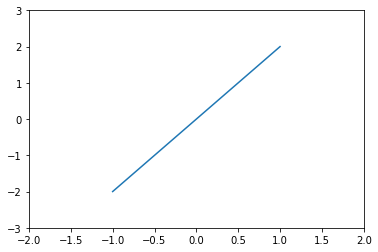

In [13]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(-1, 1.1, 0.5) # t de -1 a 1

x = t
y = 2 * t # m = 2 e n = 0

plt.plot(x, y)
plt.xlim(-2,2)
plt.ylim(-3,3)
plt.show()

## Animação variando o parâmetro t

MovieWriter ffmpeg unavailable; using Pillow instead.


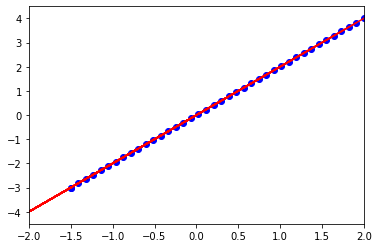

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

fig, ax = plt.subplots()

t = np.linspace(-2, -1.5, 2)

x, y = t, 2 * t
reta, = plt.plot(x, y, 'r')
ponto = plt.scatter([x[-1]], [y[-1]], color='b')

def init():
    ax.set_xlim(-2, 2)
    ax.set_ylim(-4.5, 4.5)
    return reta, ponto

def update(frame):
    t = np.linspace(-2, frame, 2)
    x, y = t, 2 * t
    
    reta, = plt.plot(x, y, 'r')
    ponto = plt.scatter([x[-1]], [y[-1]], color='b')
    return reta, ponto

ani = FuncAnimation(fig, update, frames=np.linspace(-1.5, 2 , 40),
                    init_func=init, blit=True)

ani.save("parametro.gif")

## Regiões delimitadas por retas

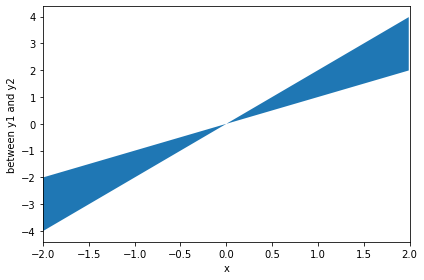

In [54]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-2, 2, 0.01)
y1 = x
y2 = 2 * x

fig = plt.figure()

plt.fill_between(x, y1, y2)
plt.ylabel('between y1 and y2')
plt.xlabel('x')

plt.xlim(-2, 2)

plt.tight_layout()

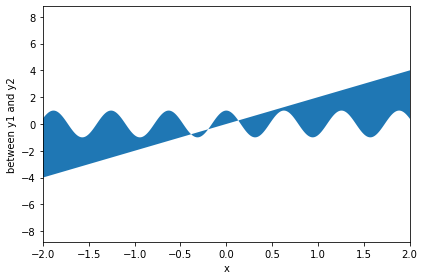

In [56]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-4, 4, 0.01)
y1 = np.cos(10 * x)
y2 = 2 * x

fig = plt.figure()

plt.fill_between(x, y1, y2)
plt.ylabel('between y1 and y2')
plt.xlabel('x')

plt.xlim(-2, 2)

plt.tight_layout()

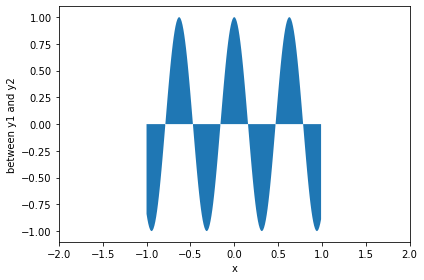

In [60]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-1, 1, 0.01)
y = np.cos(10 * x)

fig = plt.figure()

plt.fill_between(x, 0, y)
plt.ylabel('between 0 and y')
plt.xlabel('x')

plt.xlim(-2, 2)

plt.tight_layout()

## Aplicações

### Regresão linear

In [62]:
import pandas as pd

# Conjunto de dados coletados por Cobb e Douglas
df = pd.DataFrame({
    "horasTrabalho": [100,105,110,117,122,121,125,134,140], # Horas de trabalho
    "producaoEmpresa": [100,101,112,122,124,122,143,152,151], # Produção
})

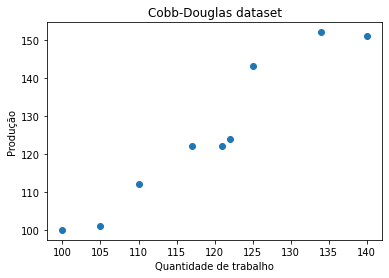

In [65]:
import matplotlib.pyplot as plt

fig = plt.figure() # janela

plt.scatter(df['horasTrabalho'], df['producaoEmpresa']) # gráfico

plt.xlabel('Quantidade de trabalho') # rótulo do eixo x
plt.ylabel('Produção') # rótulo do eixo y
plt.title('Cobb-Douglas dataset') # título

plt.show() # mostra gráfico

In [68]:
from sklearn import linear_model

variables = df['horasTrabalho'].values.reshape(-1, 1)
Z = df['producaoEmpresa']

regr = linear_model.LinearRegression() # criando o modelo
regr.fit(variables, Z) # ajustando o modelo aos dados

print('Coeficiente n: \n', regr.intercept_) # coeficiente linear
print('Coeficiente m: \n', regr.coef_) # coeficiente angular

Coeficiente n: 
 -49.31891183218616
Coeficiente m: 
 [1.4626352]


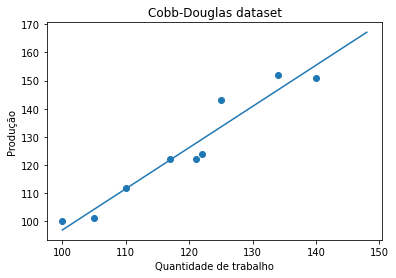

In [70]:
import matplotlib.pyplot as plt

fig = plt.figure() # janela

plt.scatter(df['horasTrabalho'], df['producaoEmpresa']) # gráfico

x = np.arange(100, 150, 3)
y = 1.4626352 * x + -49.31891183218616

plt.plot(x, y)

plt.xlabel('Quantidade de trabalho') # rótulo do eixo x
plt.ylabel('Produção') # rótulo do eixo y
plt.title('Cobb-Douglas dataset') # título

plt.show() # mostra gráfico

## Classificação por região

O conjunto de dados Iris tem três classes: setosa, versicolor e virginica. Vejamos um algoritmo famoso criar um classificador para as três classes:

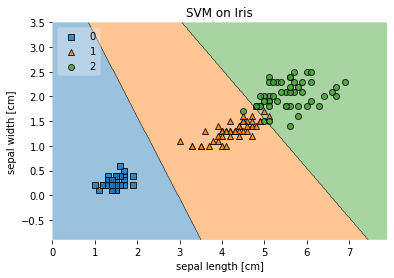

In [1]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.title('SVM on Iris')
plt.show()

Vejamos com duas classes, setosas e não setosas:

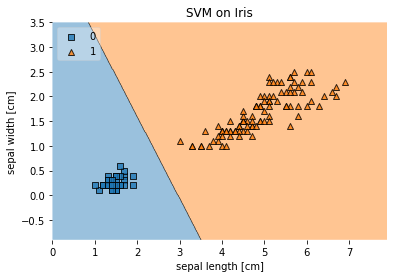

In [2]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = np.array(list(map(lambda x: x if x == 0 else 1, iris.target)))

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.title('SVM on Iris')
plt.show()

Interessante, parece que o SVM utilizou-se de uma reta para fazer o classificador. Lembrando que já fizemos uma classificação usando círculos:

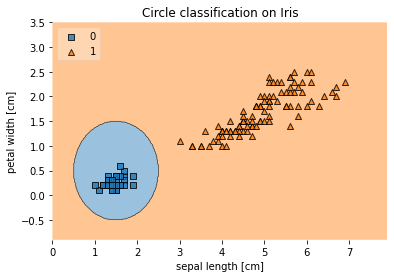

In [3]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = np.array(list(map(lambda x: x if x == 0 else 1, iris.target)))


import random
class circle_classifier():
    def predict(X):
        zeros = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            if np.linalg.norm(X[i] - np.array([1.5, 0.5])) > 1:
                zeros[i] = 1
        return zeros

# Plotting decision regions
plot_decision_regions(X, y, clf=circle_classifier, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')
plt.title('Circle classification on Iris')
plt.show()

Vamos agora fazer um classificador usando retas. Novamente, vamos escolher uma reta de forma conveniente. Ainda não estamos utilizando de algoritmos que gerem estes classificadores. Escolheremos a reta que passa por $(4,0)$ e $(0, \frac{5}{2})$.

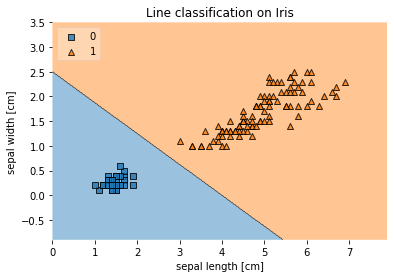

In [4]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = np.array(list(map(lambda x: x if x == 0 else 1, iris.target)))


import random
class circle_classifier():
    def predict(X):
        zeros = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            if  X[i][1] > (-5/8) * X[i][0] + (5/2): 
                zeros[i] = 1
        return zeros

# Plotting decision regions
plot_decision_regions(X, y, clf=circle_classifier, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.title('Line classification on Iris')
plt.show()